In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd
import librosa
import gradio as gr 

In [3]:
#|export
def log_mel_spec_tfm(fname):
    y, sr = librosa.load(fname, mono=True)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                  sr=sr)
    plt.savefig(str(fname[:-4]) + '.png')
    plt.close()
    return img

In [4]:
#|export
learn = load_learner('model.pkl')
learn.remove_cb(ProgressCallback)

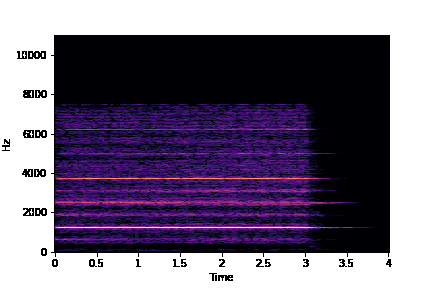

In [5]:
im = PILImage.create('flute_acoustic_002-087-127.png')
im.to_thumb(128, 128)
im

In [6]:
learn.remove_cb(ProgressCallback)
pred,pred_idx,probs = learn.predict('brass_acoustic_006-065-127.png')

[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


In [7]:
#|export
categories = ('Brass', 'Flute', 'Guitar', 'Keyboard', 'Mallet', 'Reed', 'String', 'Vocal')

def classify_aud(aud):
    try:
        log_mel_spec_tfm(aud)
        img_fname = str(aud[:-4]) + '.png'
        pred, idx, probs = learn.predict(img_fname)
        return dict(zip(categories, map(float, probs)))
    except TypeError as e:
        print(f"An error occurred while processing file: {aud}. Error message: {e}")
        return "Error: Invalid file format. Please upload a valid audio file."

In [8]:
#|export
aud = gr.Audio(source="upload", type="filepath")
examples = ['test/' + f.name for f in Path('test').iterdir() if '.wav' in f.name]

intf = gr.Interface(fn = classify_aud, inputs = aud, outputs = "label", examples = examples)
intf.launch(inline = False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


<AxesSubplot: >

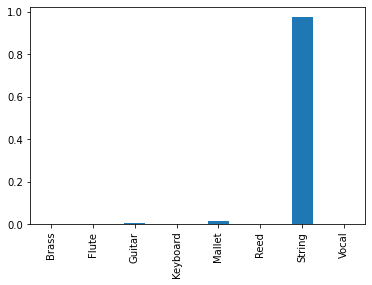

In [9]:
k = classify_aud(examples[5])

pd.Series(k).plot.bar()

In [10]:
from nbdev.export import nb_export
from nbdev.release import write_requirements

nb_export('app.ipynb', '.')
# write_requirements()